<a href="https://colab.research.google.com/github/ShivaShirsath/ImageProcessing/blob/master/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('image.jpg')

In [5]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Watershed algorithm
markers = cv2.watershed(blur, np.int32(np.ones_like(gray)))
watershed = img.copy()
watershed[markers == -1] = [255, 0, 0]

# Apply GrabCut algorithm
mask = np.zeros_like(img[:, :, 0])
rect = (50, 50, 450, 290)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
grabcut = img.copy()
grabcut[(mask == cv2.GC_PR_BGD) | (mask == cv2.GC_BGD)] = [0, 0, 255]

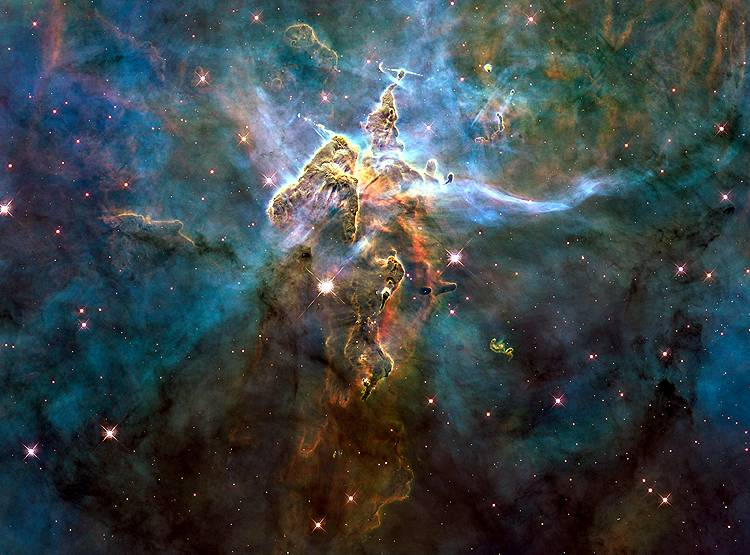

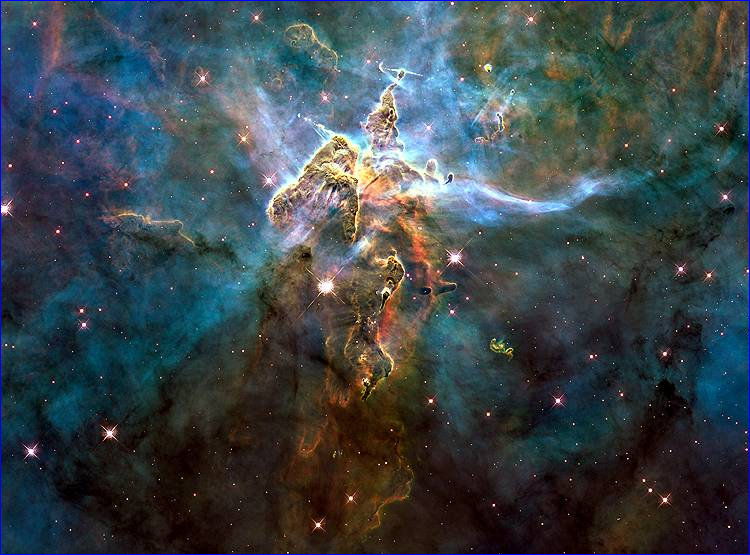

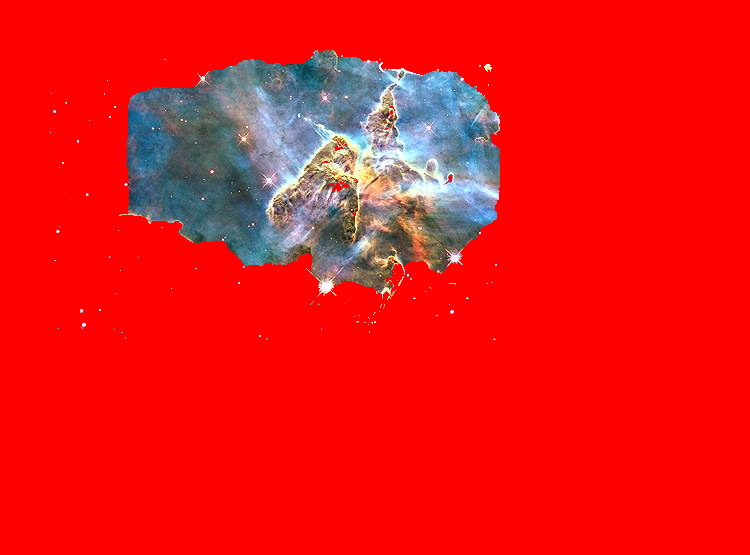

In [7]:
# Display the results
cv2_imshow(img)
cv2_imshow(watershed)
cv2_imshow(grabcut)